In [64]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf #backend
from tensorflow.keras.datasets import mnist 
from sklearn.metrics import confusion_matrix 
import itertools

In [65]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [66]:
print('Bentuk(shape) atau dimensi data : (jumlah data, tinggi piksel, lebar piksel)', x_train.shape)
print('Bentuk dari sisi data: \n')
x_train[3]

Bentuk(shape) atau dimensi data : (jumlah data, tinggi piksel, lebar piksel) (60000, 28, 28)
Bentuk dari sisi data: 



array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [67]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = np.reshape(x_test,(x_test.shape[0], 784))

In [68]:
print('Data yang diubah menjadi 2 dimensi : ')
x_train[0]

Data yang diubah menjadi 2 dimensi : 


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [69]:
x_train = x_train/255.0
x_test = x_test/255.0

In [70]:
x_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [71]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [72]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

**MODEL & TRAINING**

In [73]:
num_input = 28 * 28 

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(500, input_dim = num_input, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [74]:
hist = model.fit(x_train, y_train,
                 epochs = 15,
                 batch_size = 200,
                 validation_data = (x_test, y_test))

Epoch 1/15
300/300 [==============================] - 3s 10ms/step - loss: 0.3081 - accuracy: 0.9141 - val_loss: 0.1552 - val_accuracy: 0.9552
Epoch 2/15
300/300 [==============================] - 3s 9ms/step - loss: 0.1238 - accuracy: 0.9644 - val_loss: 0.1034 - val_accuracy: 0.9691
Epoch 3/15
300/300 [==============================] - 3s 9ms/step - loss: 0.0841 - accuracy: 0.9756 - val_loss: 0.0858 - val_accuracy: 0.9736
Epoch 4/15
300/300 [==============================] - 3s 9ms/step - loss: 0.0604 - accuracy: 0.9822 - val_loss: 0.0777 - val_accuracy: 0.9764
Epoch 5/15
300/300 [==============================] - 3s 9ms/step - loss: 0.0466 - accuracy: 0.9868 - val_loss: 0.0649 - val_accuracy: 0.9801
Epoch 6/15
300/300 [==============================] - 3s 9ms/step - loss: 0.0350 - accuracy: 0.9904 - val_loss: 0.0607 - val_accuracy: 0.9813
Epoch 7/15
300/300 [==============================] - 3s 9ms/step - loss: 0.0271 - accuracy: 0.9926 - val_loss: 0.0620 - val_accuracy: 0.9805
Epoch

In [75]:
model.save_weights('model_weights.h5') 

In [76]:
from prompt_toolkit.layout.containers import HorizontalAlign
def plot_confusion_matrix(cm, classes, normalize = False,
                          title = 'Confussion Matrix',
                          cmap = plt.cm.Blues):
  plt.figure(figsize = (10,10))
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 90)
  plt.yticks(tick_marks, classes)
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, cm[i, j],
             horizontalalignment = "center",
             color = "white" if cm[i ,j] > thresh else "black")
    plt.grid('off')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

313/313 [==============================] - 1s 2ms/step


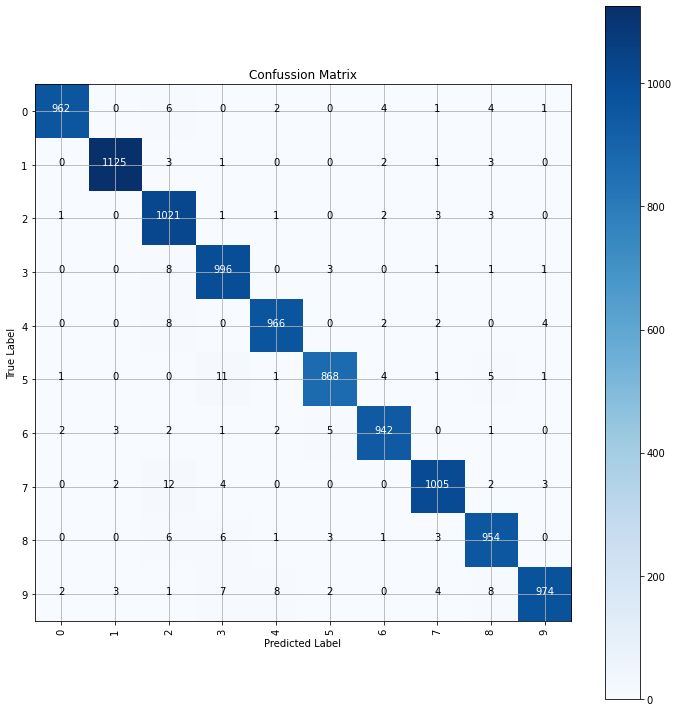

In [77]:
list_classes = [0,1,2,3,4,5,6,7,8,9]
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = list_classes)

In [78]:
img = x_test[7777]
predicted = model.predict(np.reshape(img,(1,784)))
predicted

1/1 [==============================] - 0s 15ms/step


array([[1.2517881e-14, 1.7299424e-10, 9.9095185e-09, 2.4888402e-06,
        1.0602536e-21, 9.9999750e-01, 1.7282633e-14, 1.4800372e-17,
        1.1535501e-08, 1.0564634e-12]], dtype=float32)

In [79]:
predictednumber = np.argmax(predicted)
predictednumber

5

In [80]:
np.argmax(y_test[7777])

5

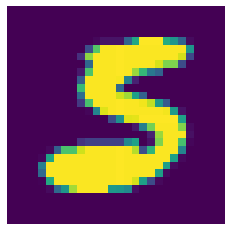

In [81]:
plt.imshow(np.reshape(x_test[7777],(28,28)))
plt.axis("off")
plt.show()